<h2> 1.Понимание бизнеса
<h3> 1.1 Цель 
<h4> Предсказать тип вина
<h3> 1.2 Описание
<h4> В качестве источника данных иcпользуются 2 датасета по красному и белому португальскому вину марки "Vinho Verde".
     На основе этих данных будем решать задачу классификации - отнесения вина к определенному типу. Классы типов несбалансированы, то есть не разделены поровну. Часть данных были выборочно удалены. 

<h2> 2.Business Understanding
<h3> 2.1 Import liberies 

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Handle table-like data and matrices 
import pandas as pd
import numpy as np

# Modelling algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

# Modelling helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
#import scikitplot as skplt


<h3> 2.2 Вспомогательные функции

In [4]:
# Парная корреляция
def plot_correltion_map(data):
    matrix = data.corr()

    # Create a custom diverging palette
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                 n=9, center="light", as_cmap=True)

    plt.figure(figsize=(10, 6))

    sns.heatmap(matrix,  center=0, annot=True,
                 fmt='.2f', square=True, cmap=cmap)
    plt.show();

<h3> 2.3 Загрузка данных

In [5]:
#url = 'https://www.kaggle.com/datasets/rajyellow46/wine-quality/winequalityN.csv'
#url = "https://www.kaggle.com/datasets/rajyellow46/wine-quality/data?select=winequalityN.csv"
data = pd.read_csv('winequalityN.csv')

<h3> 2.4 Статистика и визуализация

In [6]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Состав переменных (основано на физико-химических тестах):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

Итоговые показатели качества:
* 12 - quality (оценка от 0 до 10)

[Больше информации на сайте Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:xlabel='type', ylabel='count'>

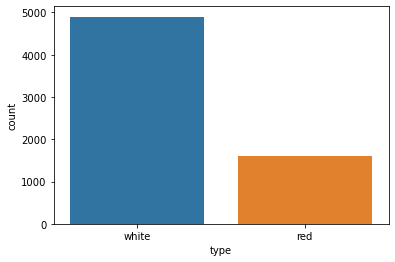

In [8]:
# построим график распределения типов
sns.countplot(x=data['type'])

<h3> 2.4.1 Ключевая информация о переменных

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# количество пустых значений
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
# преобразуем целевую функцию в числовые значение 0 и 1
data['type'].replace(['white', 'red'], [0, 1], inplace=True)

<h3> 2.4.2 Тепловая карта корреляции

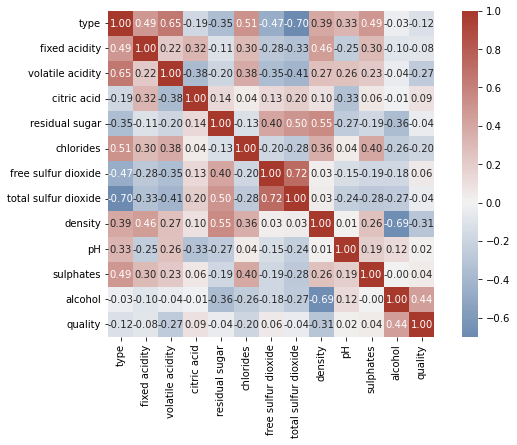

In [12]:
plot_correltion_map(data)

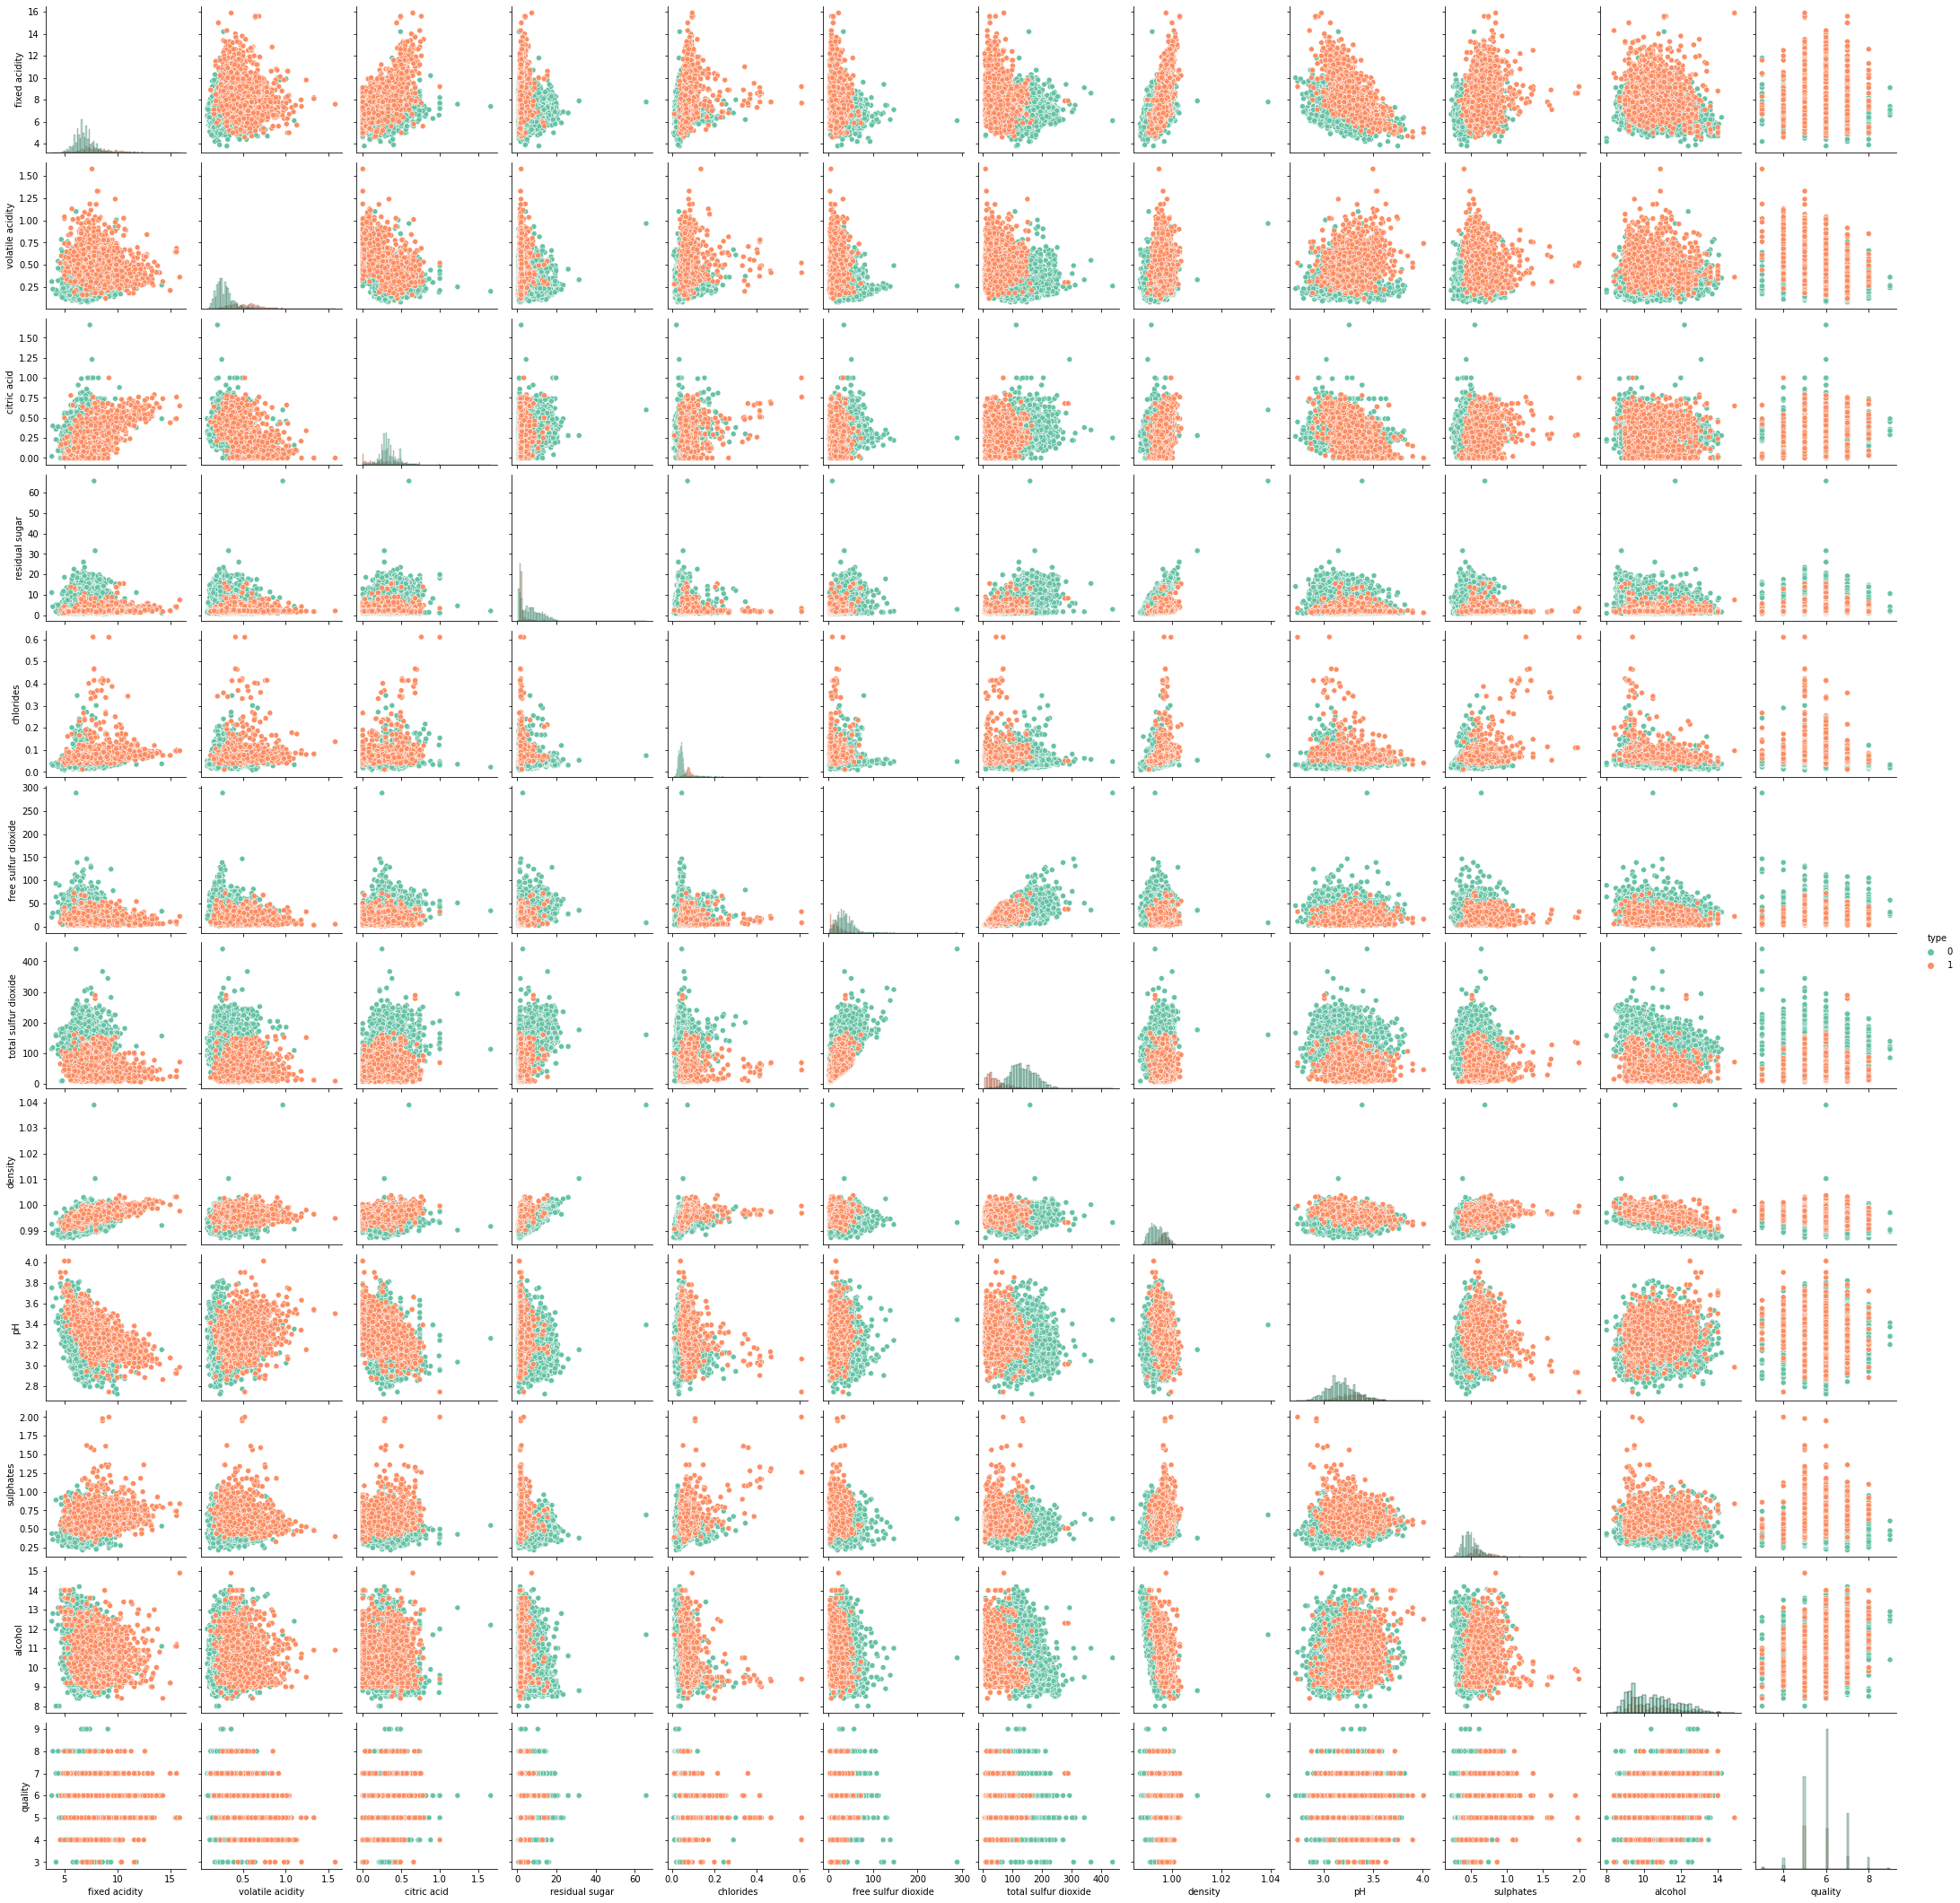

In [15]:
# Построим распределение целевой переменной по признакам
sns.pairplot(data, hue="type", diag_kind="hist",palette='Set2')#, kind="kde")

<h2> 3.Data preparation
<h3> 3.1 Заменим отсутствующие значения Модой 

In [17]:
cols = list(data)
data[cols]=data[cols].fillna(data.mode().iloc[0])
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3>3.2 Создание датасетов
<h4> Разделим выборку на обучающее и тестовое подмножество. 80% данных оставим на обучающее множество, 20% на тестовое.

In [18]:
X = data.drop(columns=['type'])
y = data['type']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h3>3.3 Выведим важность признаков, полученную после обучения модели. Отсортируем важность по убыванию.

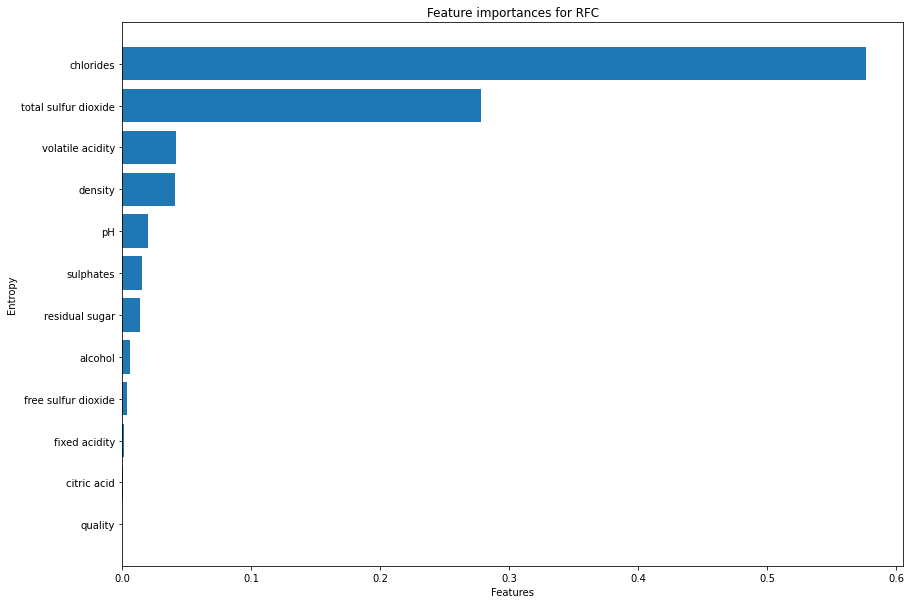

chlorides               0.577
total sulfur dioxide    0.278
volatile acidity        0.042
density                 0.041
pH                      0.020
sulphates               0.016
residual sugar          0.014
alcohol                 0.006
free sulfur dioxide     0.004
fixed acidity           0.002
citric acid             0.001
quality                 0.000
dtype: float64

In [22]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)
imp = pd.Series(clf.feature_importances_)
imp.index = pd.Series(X_train.columns)

plt.figure(figsize=(14,10))
plt.title('Feature importances for RFC')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.barh(imp.sort_values(ascending=True).index, imp.sort_values(ascending=True))
plt.show()
imp.round(3).sort_values(ascending=False)

<h2> 4.Моделирование
<h3> 4.1 Выбор модели 
<h3> Используем модель DecisionTreeClassifier

<h3> 4.2 Обучение модели

In [23]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<h2> 5. Оценка
<h3> 5.1 Модель

<h3>5. Для тестового множества сделаем предсказание целевой переменной. Выведим метрики для каждой построенной модели с помощью metrics.classification_report.

In [24]:
from sklearn.metrics import classification_report
print('Tree.DecisionTreeClassifier:', '\n', classification_report(y_test, y_pred))
#print('RandomForestClassifier:', '\n', classification_report(y_test, y_pred2))

Tree.DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.97      0.98      0.98       312

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



In [25]:
# Сводный отчет по модели
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
data2 = {'Метрики' : ['Accuracy_score', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'MAE', 'MSE','RMSE','r2_score'],
        'DecisionTreeClassifier' : [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred),mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)],
               }
frame = pd.DataFrame(data2).round(2)
frame

,Метрики,DecisionTreeClassifier
0,Accuracy_score,0.99
1,Precision,0.97
2,Recall,0.98
3,F1-Score,0.98
4,ROC AUC,0.98
5,MAE,0.01
6,MSE,0.01
7,RMSE,0.11
8,r2_score,0.94


Вывод: Модель достаточно точно предсказывает тип целевой функции.

<h2> 6. Развертывание

<AxesSubplot:xlabel='Точность', ylabel='count'>

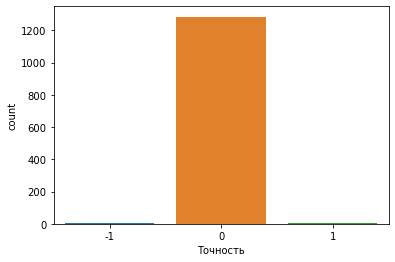

In [44]:
# построим график точности модели, где - 1 не угадан тип вина 0, 1 не угадан тип вина 0
Accuracy = pd. DataFrame({'Реальный результат': y_test, 'Предсказание': y_pred, 'Точность': y_pred-y_test  })
sns.countplot(x=Accuracy['Точность'])

In [45]:
# как вариант - публикация полученного прогноза на Kaggle
Total = pd. DataFrame({'Реальный результат': y_test, 'Предсказание': y_pred})
Total.shape
Total.head()
#Total.to_csv('Quality.csv',index=False)

,Реальный результат,Предсказание
5247,1,1
4739,0,0
218,0,0
3469,0,0
3312,0,0
